In [87]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from vinzy_imgdata_importer import img_data_importer 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Flatten
from keras.optimizers import RMSprop

In [52]:
X_train,Y_train,m = img_data_importer('D:\\Git\\Face-Recognition-Auto-Attendance-System\\Data')

Generating, Shuffling & Mapping the Data...


In [53]:
m

{'ABJ Abdul Kalam': 0,
 'Ed Sheeran': 1,
 'Manmohan Singh': 2,
 'Obama': 3,
 'Ratan Tata': 4}

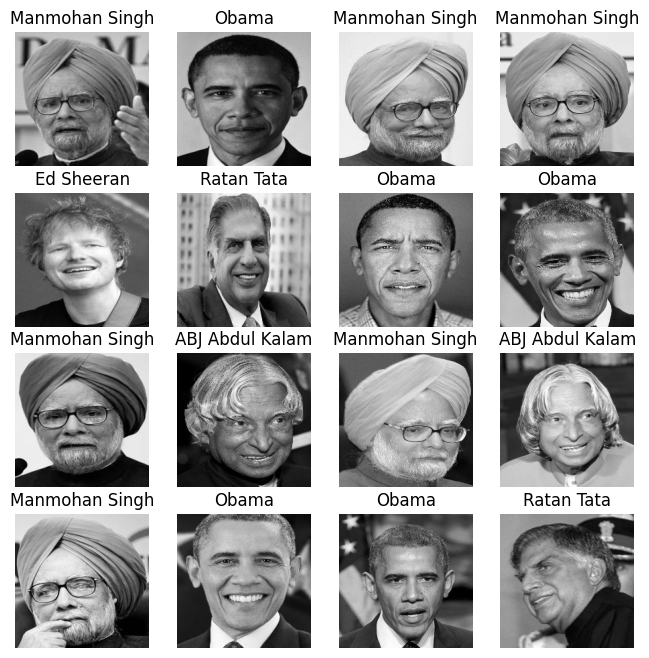

In [54]:
labels = ['ABJ Abdul Kalam','Ed Sheeran','Manmohan Singh','Obama','Ratan Tata']
plt.figure(figsize=(8,8))
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
    plt.title(labels[Y_train[i]])

In [88]:
Y_train_1 = to_categorical(list(Y_train))

In [84]:
X_train_1 = X_train.reshape(X_train.shape[0], 200, 200, 1)

In [118]:
cnn = Sequential([Conv2D(64,(4,4),activation='relu',input_shape=(200,200,1)),
                  MaxPooling2D(2,2),
                  Conv2D(64,(4,4),activation='relu',input_shape=(200,200,1)),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(20,activation='relu'),
                  Dense(40,activation='relu'),
                  Dense(5,activation='softmax')
])  

In [119]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [121]:
cnn.fit(X_train_1,Y_train_1,epochs=10)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step - accuracy: 0.6587 - loss: 0.8369
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step - accuracy: 0.7671 - loss: 0.7065
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 683ms/step - accuracy: 0.7700 - loss: 0.6302
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 679ms/step - accuracy: 0.8042 - loss: 0.4614
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 700ms/step - accuracy: 0.8071 - loss: 0.4037
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 804ms/step - accuracy: 0.8175 - loss: 0.3190
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 711ms/step - accuracy: 0.9050 - loss: 0.2502
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 697ms/step - accuracy: 1.0000 - loss: 0.1367
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 631ms/step - accuracy: 0.9525 - loss: 0.1580
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 714ms/step - accuracy: 1.0000 - loss: 0.0490


In [129]:
a = X_train[0].reshape(1,200,200,1)
labels[np.argmax(cnn.predict(a))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


'Manmohan Singh'

Text(0.5, 1.0, 'Manmohan Singh')

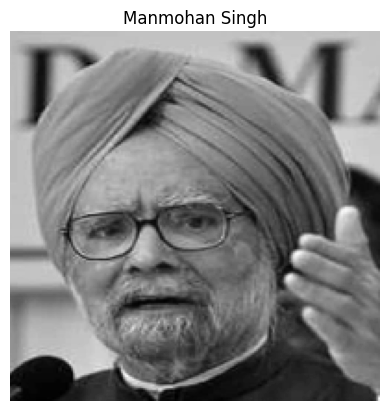

In [130]:
plt.imshow(X_train[0],cmap='gray')
plt.axis('off')
plt.title(labels[Y_train[0]])